Extraction

In [1]:
import tarfile

file = "/content/drive/MyDrive/DataSet/cifar-100-python.tar.gz"
if file.endswith("tar.gz"):
    tar = tarfile.open(file, "r:gz")
    tar.extractall()
    tar.close()

/tmp/ipython-input-1087592980.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


Loading

In [2]:
import pickle
import numpy as np

def load_cifar100_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


train_data = load_cifar100_batch("cifar-100-python/train")
test_data  = load_cifar100_batch("cifar-100-python/test")
meta_data  = load_cifar100_batch("cifar-100-python/meta")


X_train = train_data[b'data']
y_train = train_data[b'fine_labels']

X_test  = test_data[b'data']
y_test  = test_data[b'fine_labels']


X_train = X_train.reshape(-1, 3, 32, 32).transpose(0,2,3,1)  # (N, H, W, C)
X_test  = X_test.reshape(-1, 3, 32, 32).transpose(0,2,3,1)


Normalize

In [3]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 100)
y_test  = to_categorical(y_test, 100)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


CNN

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_custom_cnn.h5", save_best_only=True, monitor='val_accuracy')


In [8]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stop, checkpoint])


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0307 - loss: 4.5885

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.0307 - loss: 4.5882 - val_accuracy: 0.1055 - val_loss: 3.8525
Epoch 2/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0760 - loss: 4.0447

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0760 - loss: 4.0443 - val_accuracy: 0.1147 - val_loss: 3.9059
Epoch 3/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1104 - loss: 3.7866

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1105 - loss: 3.7862 - val_accuracy: 0.2159 - val_loss: 3.2785
Epoch 4/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1486 - loss: 3.5541

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1486 - loss: 3.5540 - val_accuracy: 0.2292 - val_loss: 3.1898
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1795 - loss: 3.3924 - val_accuracy: 0.1997 - val_loss: 3.4433
Epoch 6/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2109 - loss: 3.2143

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2109 - loss: 3.2141 - val_accuracy: 0.2899 - val_loss: 2.8976
Epoch 7/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2381 - loss: 3.0683

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2381 - loss: 3.0683 - val_accuracy: 0.3208 - val_loss: 2.7573
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2659 - loss: 2.9418 - val_accuracy: 0.3206 - val_loss: 2.7116
Epoch 9/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2780 - loss: 2.8276

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2781 - loss: 2.8275 - val_accuracy: 0.3603 - val_loss: 2.5107
Epoch 10/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3012 - loss: 2.7395

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3012 - loss: 2.7393 - val_accuracy: 0.3744 - val_loss: 2.4842
Epoch 11/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3239 - loss: 2.6297

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3240 - loss: 2.6297 - val_accuracy: 0.3961 - val_loss: 2.3502
Epoch 12/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3399 - loss: 2.5456

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3399 - loss: 2.5457 - val_accuracy: 0.4140 - val_loss: 2.2914
Epoch 13/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3572 - loss: 2.4532 - val_accuracy: 0.4052 - val_loss: 2.3237
Epoch 14/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3716 - loss: 2.3906

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3716 - loss: 2.3906 - val_accuracy: 0.4160 - val_loss: 2.2576
Epoch 15/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3915 - loss: 2.3158

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3914 - loss: 2.3161 - val_accuracy: 0.4405 - val_loss: 2.1245
Epoch 16/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4040 - loss: 2.2492

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4039 - loss: 2.2495 - val_accuracy: 0.4479 - val_loss: 2.0969
Epoch 17/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4089 - loss: 2.2242 - val_accuracy: 0.4154 - val_loss: 2.3092
Epoch 18/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4202 - loss: 2.1793

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4201 - loss: 2.1794 - val_accuracy: 0.4540 - val_loss: 2.0939
Epoch 19/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4285 - loss: 2.1174 - val_accuracy: 0.4395 - val_loss: 2.1653
Epoch 20/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4363 - loss: 2.0773 - val_accuracy: 0.4458 - val_loss: 2.1100
Epoch 21/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4433 - loss: 2.0556

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4432 - loss: 2.0559 - val_accuracy: 0.4786 - val_loss: 1.9867
Epoch 22/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4541 - loss: 2.0207 - val_accuracy: 0.4769 - val_loss: 1.9753
Epoch 23/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4564 - loss: 1.9964 - val_accuracy: 0.4675 - val_loss: 2.0515
Epoch 24/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4593 - loss: 1.9880

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4593 - loss: 1.9881 - val_accuracy: 0.4805 - val_loss: 1.9613
Epoch 25/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4712 - loss: 1.9308 - val_accuracy: 0.4664 - val_loss: 2.0659
Epoch 26/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4720 - loss: 1.9173 - val_accuracy: 0.4685 - val_loss: 2.0174
Epoch 27/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4832 - loss: 1.8897 - val_accuracy: 0.4736 - val_loss: 2.0325
Epoch 28/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4835 - loss: 1.8890

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4835 - loss: 1.8890 - val_accuracy: 0.5031 - val_loss: 1.8867
Epoch 29/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4896 - loss: 1.8601 - val_accuracy: 0.4820 - val_loss: 1.9746
Epoch 30/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4866 - loss: 1.8629 - val_accuracy: 0.4540 - val_loss: 2.1334
Epoch 31/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4948 - loss: 1.8136 - val_accuracy: 0.4913 - val_loss: 1.9442
Epoch 32/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4993 - loss: 1.8176

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4992 - loss: 1.8177 - val_accuracy: 0.5098 - val_loss: 1.8411
Epoch 33/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5001 - loss: 1.7892 - val_accuracy: 0.4477 - val_loss: 2.1962
Epoch 34/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5026 - loss: 1.7747 - val_accuracy: 0.4939 - val_loss: 1.9100
Epoch 35/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5089 - loss: 1.7722 - val_accuracy: 0.4839 - val_loss: 1.9649
Epoch 36/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5098 - loss: 1.7616 - val_accuracy: 0.4996 - val_loss: 1.8615
Epoch 37/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5135 - loss: 1.7358 - val_accuracy: 0.5053 - val_loss: 1.8574


In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Custom CNN Test Accuracy: {test_acc:.4f}")


313/313 - 2s - 5ms/step - accuracy: 0.5098 - loss: 1.8411
Custom CNN Test Accuracy: 0.5098


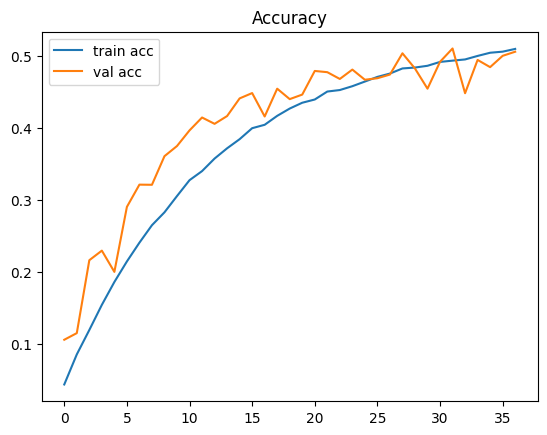

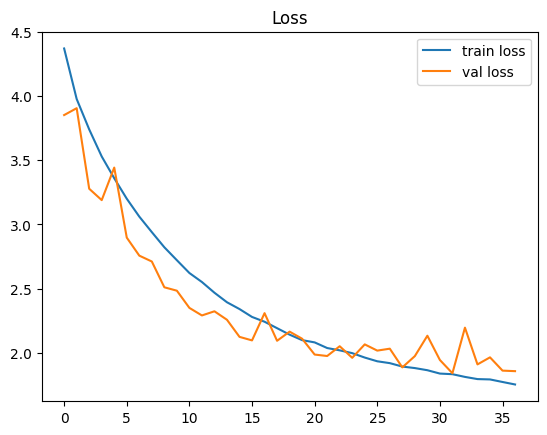

In [10]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss")
plt.show()


In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D


Load

In [12]:

base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(32,32,3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [15]:
model_vgg = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])


In [16]:
model_vgg.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [17]:
history_vgg = model_vgg.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=30,
                            batch_size=64,
                            callbacks=[early_stop, checkpoint])


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 75ms/step - accuracy: 0.0084 - loss: 4.7997 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.0095 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.0084 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.0098 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.0092 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.0082 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.0093 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.0094 - loss: 4.6055 - 

In [18]:
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(X_test, y_test, verbose=2)
print(f"VGG16 Test Accuracy: {test_acc_vgg:.4f}")


313/313 - 4s - 13ms/step - accuracy: 0.0100 - loss: 4.6052
VGG16 Test Accuracy: 0.0100


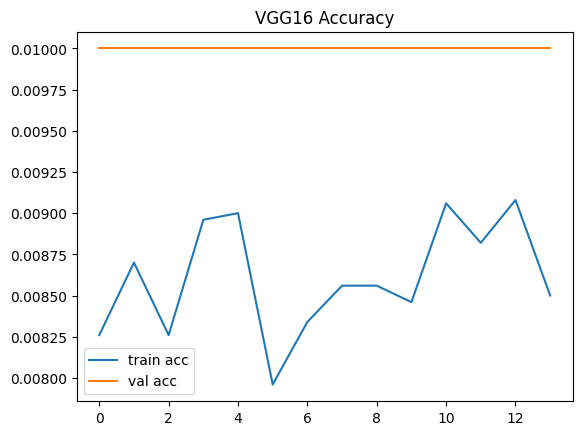

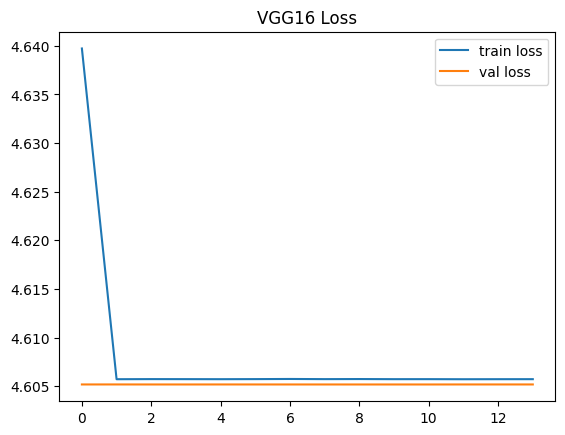

In [19]:
plt.plot(history_vgg.history['accuracy'], label='train acc')
plt.plot(history_vgg.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("VGG16 Accuracy")
plt.show()

plt.plot(history_vgg.history['loss'], label='train loss')
plt.plot(history_vgg.history['val_loss'], label='val loss')
plt.legend()
plt.title("VGG16 Loss")
plt.show()


In [20]:
import pandas as pd

results = {
    "Model": ["Custom CNN", "VGG16"],
    "Test Accuracy": [test_acc, test_acc_vgg]
}

results_df = pd.DataFrame(results)
print(results_df)


        Model  Test Accuracy
0  Custom CNN         0.5098
1       VGG16         0.0100


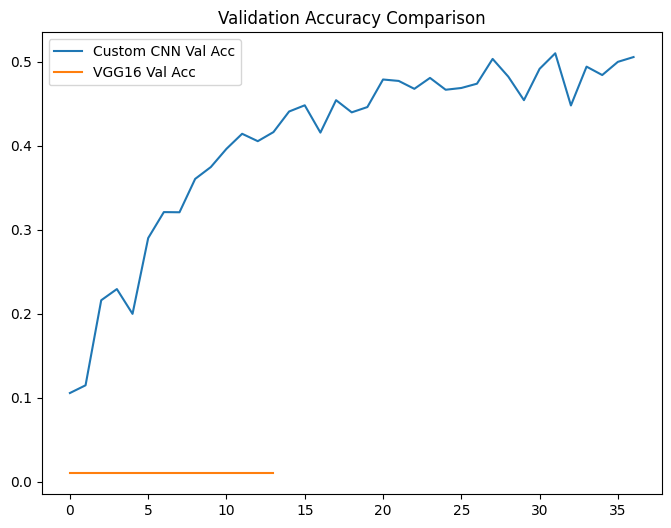

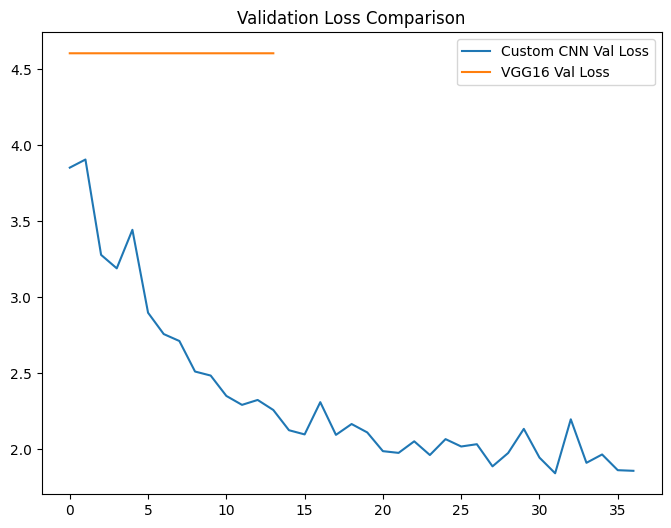

In [21]:

plt.figure(figsize=(8,6))
plt.plot(history.history['val_accuracy'], label='Custom CNN Val Acc')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Val Acc')
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()


plt.figure(figsize=(8,6))
plt.plot(history.history['val_loss'], label='Custom CNN Val Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG16 Val Loss')
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()


In [22]:
print("Custom CNN Summary:")
model.summary()

print("\nVGG16 Model Summary:")
model_vgg.summary()


Custom CNN Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,932,270 (7.37 MB)

 Trainable params: 643,940 (2.46 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,287,882 (4.91 MB)


VGG16 Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,615,150 (170.19 MB)

 Trainable params: 14,871,716 (56.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,743,434 (113.46 MB)

Custom VGG16

In [27]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

num_classes = 100
input_shape = (32, 32, 3)

def build_vgg16_cifar(input_shape=(32,32,3), num_classes=100):
    model = Sequential(name="VGG16_custom")

    # Block 1: 64,64 + pool
    model.add(Conv2D(64, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal', input_shape=input_shape))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 2: 128,128 + pool
    model.add(Conv2D(128, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 3: 256,256,256 + pool
    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 4: 512,512,512 + pool
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Block 5: 512,512,512 + pool
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same',
                     kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    # Classifier (VGG: Flatten -> 4096 -> 4096 -> num_classes)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

vgg16_custom = build_vgg16_cifar(input_shape, num_classes)
vgg16_custom.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
ckpt = ModelCheckpoint("best_vgg16_custom.h5", monitor='val_accuracy', save_best_only=True)

history_vgg_custom = vgg16_custom.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, ckpt],
    verbose=1
)

test_loss_vggc, test_acc_vggc = vgg16_custom.evaluate(X_test, y_test, verbose=0)
print(f"VGG16 (custom-built) Test Accuracy: {test_acc_vggc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0089 - loss: 4.6299

782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 77ms/step - accuracy: 0.0089 - loss: 4.6299 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 64ms/step - accuracy: 0.0095 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.0089 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.0091 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.0090 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.0088 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.0091 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.0091 - loss: 4.6055 - val_accurac

In [28]:
test_loss_vggc, test_acc_vggc = vgg16_custom.evaluate(X_test, y_test, verbose=2)
print(f"Custom VGG16 Test Accuracy: {test_acc_vggc:.4f}")


313/313 - 3s - 8ms/step - accuracy: 0.0100 - loss: 4.6052
Custom VGG16 Test Accuracy: 0.0100


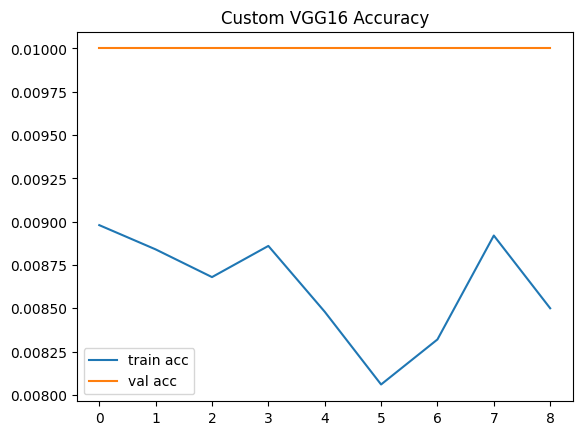

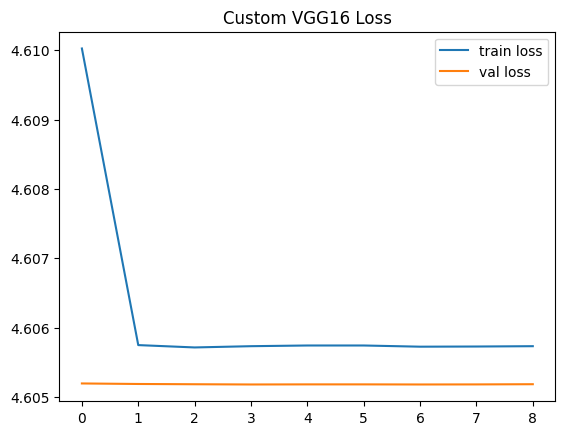

In [29]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history_vgg_custom.history['accuracy'], label='train acc')
plt.plot(history_vgg_custom.history['val_accuracy'], label='val acc')
plt.title("Custom VGG16 Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history_vgg_custom.history['loss'], label='train loss')
plt.plot(history_vgg_custom.history['val_loss'], label='val loss')
plt.title("Custom VGG16 Loss")
plt.legend()
plt.show()


In [30]:
import pandas as pd

results = {
    "Model": ["Custom CNN", "VGG16 (Pretrained)", "VGG16 (Custom Built)"],
    "Test Accuracy": [test_acc, test_acc_vgg, test_acc_vggc]
}

results_df = pd.DataFrame(results)
print(results_df)


                  Model  Test Accuracy
0            Custom CNN         0.5098
1    VGG16 (Pretrained)         0.0100
2  VGG16 (Custom Built)         0.0100


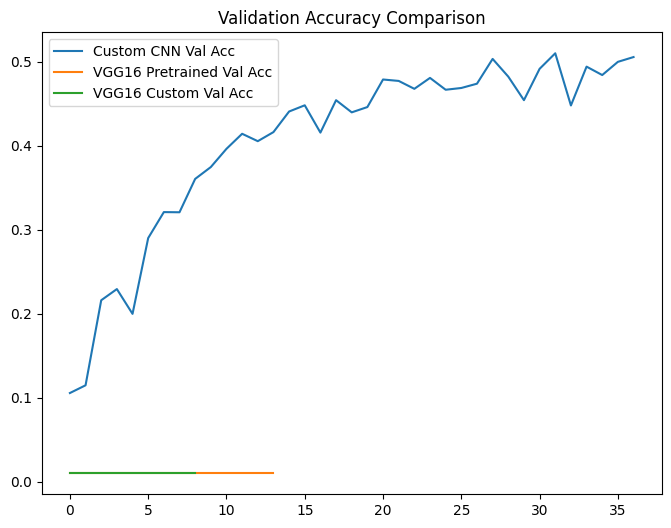

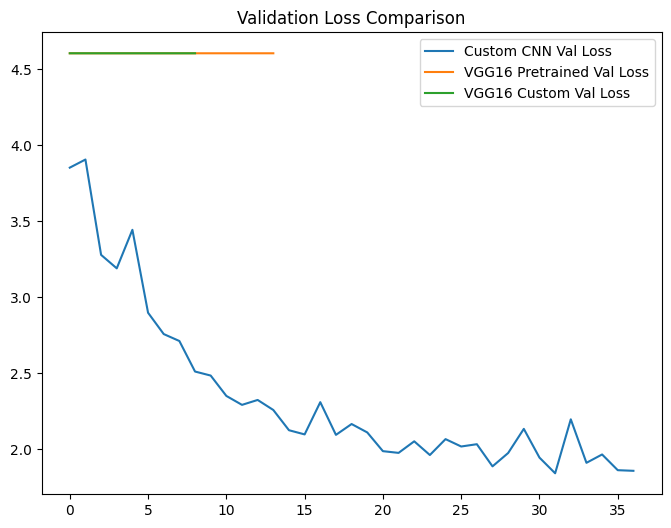

In [31]:
plt.figure(figsize=(8,6))
plt.plot(history.history['val_accuracy'], label='Custom CNN Val Acc')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Pretrained Val Acc')
plt.plot(history_vgg_custom.history['val_accuracy'], label='VGG16 Custom Val Acc')
plt.legend()
plt.title("Validation Accuracy Comparison")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['val_loss'], label='Custom CNN Val Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG16 Pretrained Val Loss')
plt.plot(history_vgg_custom.history['val_loss'], label='VGG16 Custom Val Loss')
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()
